# Introduction
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

**What?** Autoencoder Feature Extraction for Classification

</font>
</div>

# Autoencoder and feature extraction
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- An autoencoder is composed of an encoder and a decoder sub-models. The encoder compresses the input and the decoder attempts to recreate the input from the compressed version provided by the encoder. 
- After training, the encoder model is saved and the decoder is **discarded**.
- The encoder can then be used as a data preparation technique to **perform feature extraction** on raw data that can be used to train a different machine learning model.
- Recall thath the output of the model at the bottleneck is a fixed-length vector that provides a **compressed representation** of the input data.
- **To be more specific**: input data from the domain can then be provided to the model and the output of the model at the bottleneck can be used as a feature vector in a supervised learning model, for visualization, or more generally for dimensionality reduction.

</font>
</div>

# Import modules
<hr style="border:2px solid black"> </hr>

In [30]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import os
from matplotlib import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
# Getting rid of the warning messages
import warnings
warnings.filterwarnings("ignore")

# Create synthetic dataset
<hr style="border:2px solid black"> </hr>

In [7]:
# Create dataset
X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
print(X.shape, y.shape)

# No of input columns
n_inputs = X.shape[1]

# Split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)


(1000, 100) (1000,)


# Modelling
<hr style="border:2px solid black"> </hr>

In [8]:
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

# bottleneck
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(e)

# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense (Dense)                (None, 200)               20200     
_________________________________________________________________
batch_normalization (BatchNo (None, 200)               800       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100)               0     

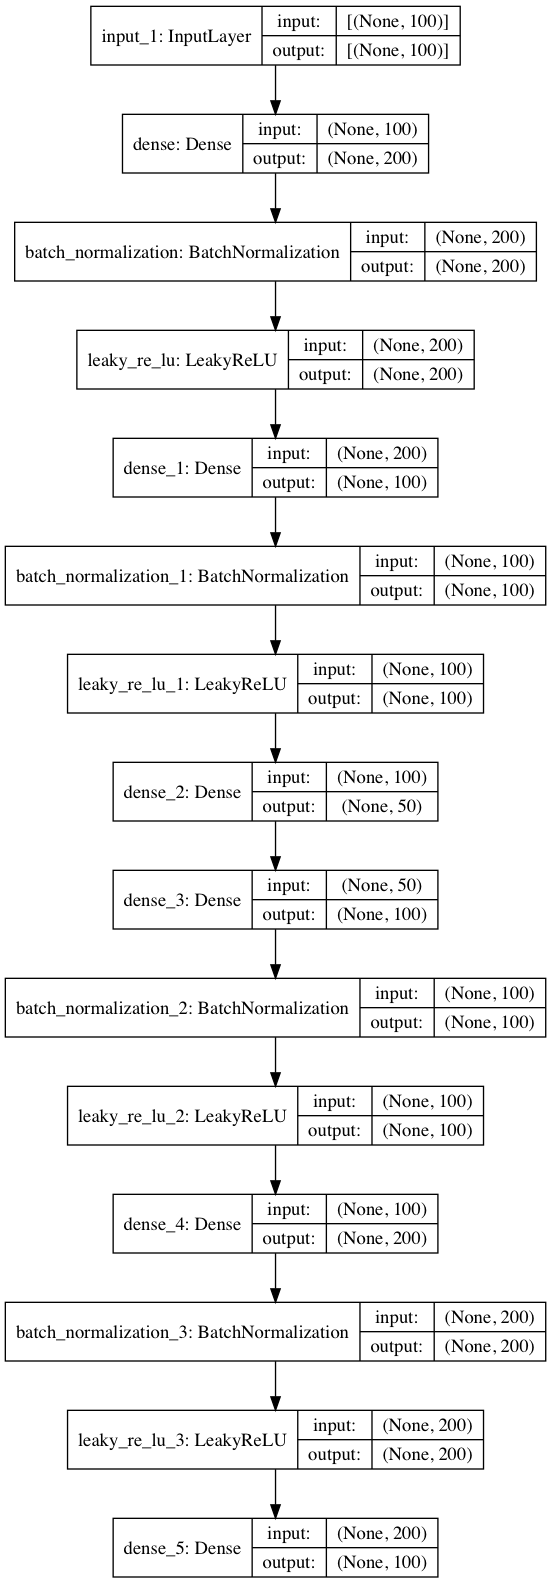

In [10]:
# plot the autoencoder
plot_model(model, show_shapes=True)

In [12]:
try:
    os.remove("./model.png")
except:
    pass

# Training
<hr style="border:2px solid black"> </hr>

In [13]:
# Fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=200, batch_size=16, verbose=2, validation_data=(X_test,X_test))

Epoch 1/200
42/42 - 2s - loss: 0.2302 - val_loss: 0.1605
Epoch 2/200
42/42 - 0s - loss: 0.0350 - val_loss: 0.0965
Epoch 3/200
42/42 - 0s - loss: 0.0238 - val_loss: 0.0580
Epoch 4/200
42/42 - 0s - loss: 0.0187 - val_loss: 0.0329
Epoch 5/200
42/42 - 0s - loss: 0.0170 - val_loss: 0.0198
Epoch 6/200
42/42 - 0s - loss: 0.0147 - val_loss: 0.0134
Epoch 7/200
42/42 - 0s - loss: 0.0136 - val_loss: 0.0122
Epoch 8/200
42/42 - 0s - loss: 0.0123 - val_loss: 0.0084
Epoch 9/200
42/42 - 0s - loss: 0.0115 - val_loss: 0.0073
Epoch 10/200
42/42 - 0s - loss: 0.0099 - val_loss: 0.0066
Epoch 11/200
42/42 - 0s - loss: 0.0112 - val_loss: 0.0088
Epoch 12/200
42/42 - 0s - loss: 0.0101 - val_loss: 0.0067
Epoch 13/200
42/42 - 0s - loss: 0.0095 - val_loss: 0.0053
Epoch 14/200
42/42 - 0s - loss: 0.0098 - val_loss: 0.0049
Epoch 15/200
42/42 - 0s - loss: 0.0093 - val_loss: 0.0053
Epoch 16/200
42/42 - 0s - loss: 0.0085 - val_loss: 0.0043
Epoch 17/200
42/42 - 0s - loss: 0.0085 - val_loss: 0.0060
Epoch 18/200
42/42 - 0s

Epoch 142/200
42/42 - 0s - loss: 0.0035 - val_loss: 0.0016
Epoch 143/200
42/42 - 0s - loss: 0.0033 - val_loss: 0.0019
Epoch 144/200
42/42 - 0s - loss: 0.0034 - val_loss: 0.0015
Epoch 145/200
42/42 - 0s - loss: 0.0035 - val_loss: 0.0015
Epoch 146/200
42/42 - 0s - loss: 0.0035 - val_loss: 0.0020
Epoch 147/200
42/42 - 0s - loss: 0.0036 - val_loss: 0.0019
Epoch 148/200
42/42 - 0s - loss: 0.0035 - val_loss: 0.0020
Epoch 149/200
42/42 - 0s - loss: 0.0036 - val_loss: 0.0017
Epoch 150/200
42/42 - 0s - loss: 0.0034 - val_loss: 0.0013
Epoch 151/200
42/42 - 0s - loss: 0.0033 - val_loss: 0.0024
Epoch 152/200
42/42 - 0s - loss: 0.0035 - val_loss: 0.0018
Epoch 153/200
42/42 - 0s - loss: 0.0034 - val_loss: 0.0016
Epoch 154/200
42/42 - 0s - loss: 0.0033 - val_loss: 0.0018
Epoch 155/200
42/42 - 0s - loss: 0.0033 - val_loss: 0.0017
Epoch 156/200
42/42 - 0s - loss: 0.0035 - val_loss: 0.0022
Epoch 157/200
42/42 - 0s - loss: 0.0034 - val_loss: 0.0014
Epoch 158/200
42/42 - 0s - loss: 0.0031 - val_loss: 0.00

# Model diagnostic
<hr style="border:2px solid black"> </hr>

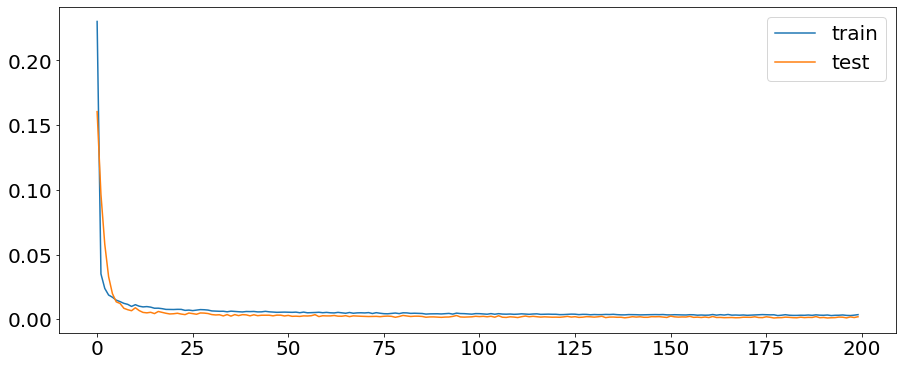

In [17]:
rcParams['figure.figsize'] = 15, 6
rcParams['font.size'] = 20

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# Define an encoder model (without the decoder)

<div class="alert alert-info">
<font color=black>

- From the model diagnostic we can be sure the model has no overfitted the data.
- We can now save just the **trained** encoder as `encoder.h5` so we can load-and-sued withouth retraining it again.
- Recall that we can use the encoder (input->bottleneck) as a datapreparation.

</font>
</div>

In [22]:
encoder = Model(inputs=visible, outputs=bottleneck)

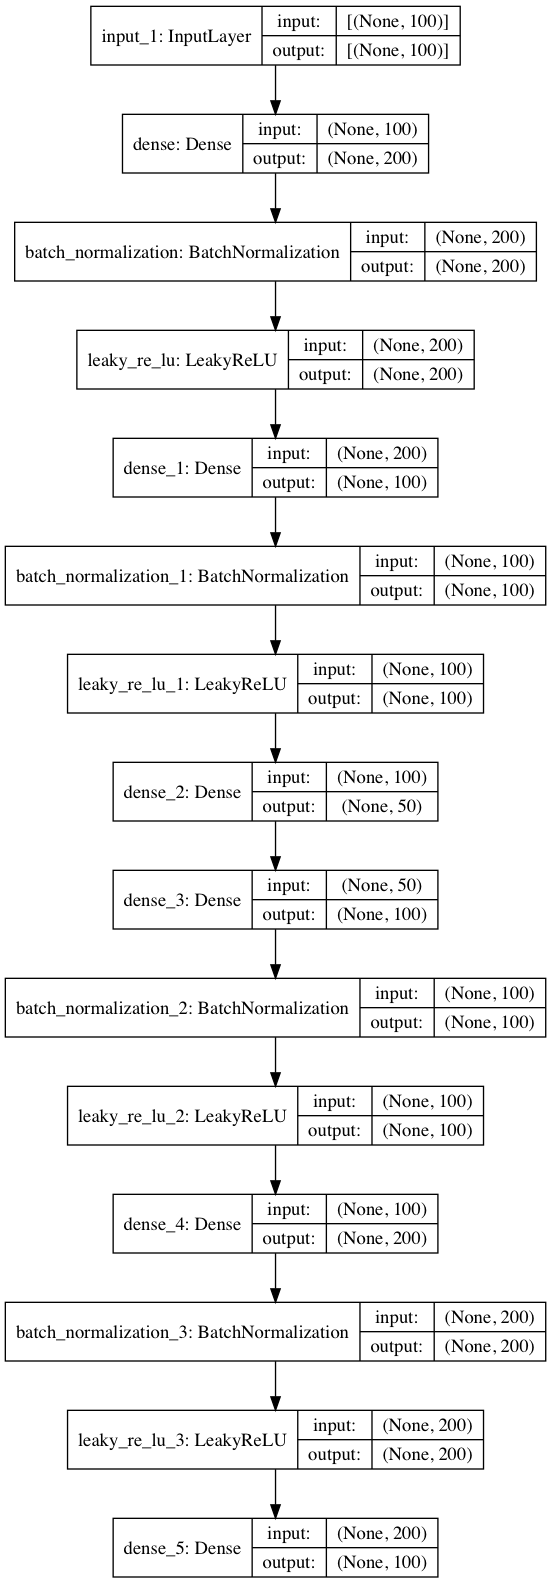

In [20]:
# The whole model
plot_model(model, show_shapes=True)

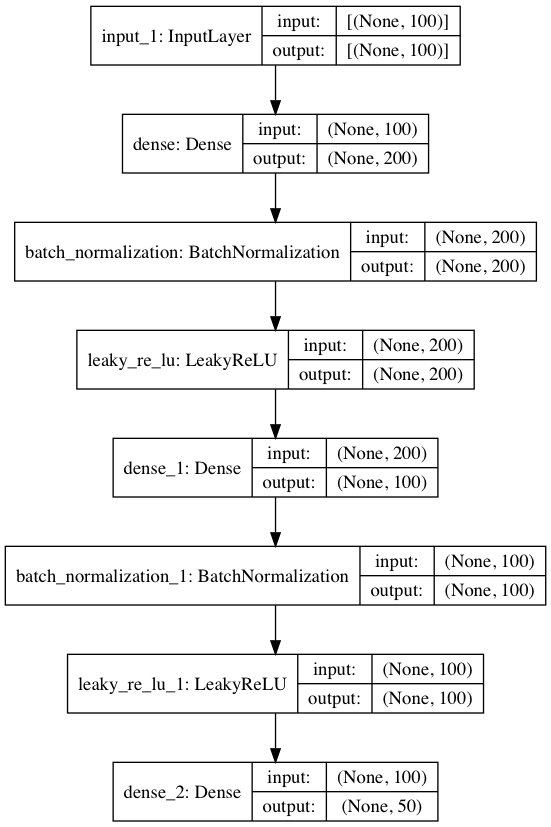

In [19]:
# Just the encoder part
plot_model(encoder, show_shapes=True)

In [23]:
# Dump the encoder
encoder.save('./encoder.h5')

# Build a baseline model
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- We'd like to use the **trained** encoder to compress the input data and train a different predictive model.

- This is important as if the performance of a model is not improved by the compressed encoding, then the compressed encoding does not add value to the project and should not be used. To do so we'll use a a baseline model to gauge the usefulness of compression the input.

- Out baseline model is based on a logistic regression model.

</font>
</div>

In [26]:
# Define model
model = LogisticRegression()
# Fitting
model.fit(X_train, y_train)
# Predict
yhat = model.predict(X_test)
# Get accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

0.8939393939393939


# Pre-process the data with the encoder
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- You will see how the input pre-processed by the encoder will lift the accuracy from arounf `0.83` to over `0.9`.

</font>
</div>

In [31]:
# load the model from file
encoder = load_model('encoder.h5')
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model = LogisticRegression()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

0.9333333333333333


# Some cleanup 
<hr style="border:2px solid black"> </hr>

In [32]:
try:
    os.remove("./encoder.h5")
except:
    pass
try:
    os.remove("./model.png")
except:
    pass

# References
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

- https://machinelearningmastery.com/autoencoder-for-classification/

</font>
</div>